# <b>Milestone 1

This sections must be run in order to load an preprocess data in preparation to run the model. Please Run the whole section "Milestone 1" before attempting to run any of the models of section "Milestone 2" which can be run independently. 

## **1. Problem definition**

### **1.1 Context**

>*“Malaria is an acute febrile illness caused by Plasmodium parasites, which are spread to people through the bites of infected female Anopheles mosquitoes. There are 5 parasite species that cause malaria in humans, and 2 of these species – P. falciparum and P. vivax – pose the greatest threat.*

> *The first symptoms – fever, headache and chills – may be mild and difficult to recognize as malaria. Left untreated, P. falciparum malaria can progress to severe illness and death within a period of 24 hours.*

> *In 2020, nearly half of the world's population was at risk of malaria.*

> *According to the latest World malaria report, there were 241 million cases of malaria in 2020.  The estimated number of malaria deaths stood at 627 000 in 2020.* 

> *Early diagnosis and treatment of malaria reduces disease, prevents deaths and contributes to reducing transmission. Diagnostic testing enables health providers to swiftly distinguish between malarial and non-malarial fevers, facilitating appropriate treatment.”*

https://www.who.int/news-room/fact-sheets/detail/malaria

But diagnosis often requires trained professionals to make the diagnosis, and the accuracy of the diagnosis depends to a large extent on the quality of the professionals who perform it. 

Moreover, in the areas most affected by malaria, access to highly qualified human resources is scarce in relation to demand (according to the World Health Organization (WHO) 
"*The WHO African region bears a disproportionately high share of the global malaria burden. In 2020, the region was home to 95% of malaria cases and 96% of malaria deaths. Children under 5 years of age accounted for about 80% of all malaria deaths in the Region."
) 


Since automated classification techniques based on the use of machine learning have consistently demonstrated higher accuracy than manual classification, the implementation of an automated diagnostic system could be very useful in preventing malaria deaths and reducing transmission.

Still, It is important to note that this system would solve one part of the problem: diagnosis. 

But there are other issues to be resolved: 
- Pre- diagnostic issues: 
 - Rapid access to trained personnel to obtain the blood sample, perform the staining correctly and have the means for capturing a sufficiently clear image to enter into the model. 
- Treatment-related:

 - Access to medicines for proper treatment once the diagnosis is made. 

 - Follow-up of positive cases. 

If everything works, we will be looking at a cost-effective, reliable and fast diagnostic system that will also save on misprescribed drugs and make better use of available resources. 




###1.2 Objectives

To build an efficient computer vision model able to discriminate between healthy and infected red blood cells.

The model should identify whether a given image of a red blood cell is that of one infected with malaria or not, and classify the same as parasitized or uninfected, respectively.




###1.3 Description of the data

There are a total of 24,958 training and 2,600 test (colored) images of microscopic red blood cells. These images are of the following categories

Parasitized: Parasitized cells contain the Plasmodium parasite that causes malaria.

Uninfected: Uninfected cells are free of Plasmodium parasites.


##**2. Loadings**

###2.1 Mounting the Drive

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###2.2 Loading libraries

In [2]:
#@title
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras import optimizers


# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### 2.3 Loading the data


The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [3]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [4]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [5]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [6]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [7]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

2.3.1 Checking the shape of train and test images

In [8]:
#S hape of images
print("Train_images shape is:", train_images.shape) 
print("Test_images shape is:", test_images.shape)

Train_images shape is: (24958, 64, 64, 3)
Test_images shape is: (2600, 64, 64, 3)


In [9]:
# Ammount of labels
print("Total labels in train:",  train_labels.shape)
print("Total lbels in test:",  test_labels.shape)


Total labels in train: (24958,)
Total lbels in test: (2600,)



Observations and insights:

Now we have train and test images with size 64 by 64 pixels. 

We have 24958 images in the Train set with their respective labels and 2600 images with their respective labels in the Test set.






2.3.2 Check the minimum and maximum range of pixel values for train and test images

In [10]:
# Try to use min and; max function from numpy
print("minimum train_images value:", train_images.min())
print("maximum train_images value:",train_images.max())
print("minimum test_images value:",test_images.min())
print("maximum test_images value:",test_images.max())

minimum train_images value: 0
maximum train_images value: 255
minimum test_images value: 0
maximum test_images value: 255


Observations and insights:

The range of pixel values in both train and test sets are 0 to 255.

We need to normalize that range into a range 0 to 1 which can be done by dividing each value by the maximum value (255).

Normalizing makes training faster. It reduces the range of the pixel values which increases the chances for the model to converge by preventing one input variable to vary over a small range while another input variable varies over a big range (which can be a challenge for the backpropagation).



###2.4 Checking if data is balanced

In [11]:
pd.Index(train_labels).value_counts()

1    12582
0    12376
dtype: int64

In [12]:
# Try to use value_counts to count the values

print("Total images in training set:", len(train_labels))
print(pd.Index(train_labels).value_counts())

print("\nTotal images in test set:", len(test_labels))
print(pd.Index(test_labels).value_counts())

print("\nReferences: \n1 = Parasitized \n0 = Uninfected ")

Total images in training set: 24958
1    12582
0    12376
dtype: int64

Total images in test set: 2600
1    1300
0    1300
dtype: int64

References: 
1 = Parasitized 
0 = Uninfected 


Observations and insights:
 
We have a training data set with 24958 images out of which 12582 (50,41%) belong to parasitized cells and the rest are uninfected cells (49,58%).

As there is a very small difference between one category and the other (less than 1%) we can consider that the training data is balanced.

Regarding the test data set we have 2600 images out of which 1300 belongs to parasitized blood cells and 1300 uninfected blood cells.




Plot to check if the data is balanced

Text(0.5, 0, '0 = Uninfected   1 = Parasitized')

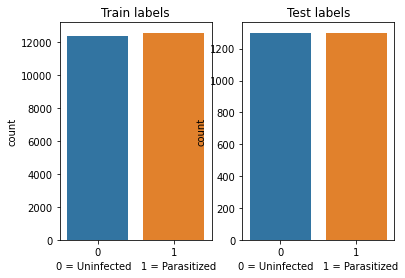

In [13]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced

plt.subplot(1,2,1)
sns.countplot(train_labels)
plt.title("Train labels")
plt.xlabel("0 = Uninfected   1 = Parasitized")
plt.subplot(1,2,2)
sns.countplot(test_labels)
plt.title("Test labels")
plt.xlabel("0 = Uninfected   1 = Parasitized")



Observations and insights: 

As mentioned before, que can appreciate with the plot that the data is balanced. This is important so that we are sure that we are training the model with enough examples of both categories which helps to avoid bias in the output.

##**3. Data Exploration**




####3.1 Let's visualize the images from the train data

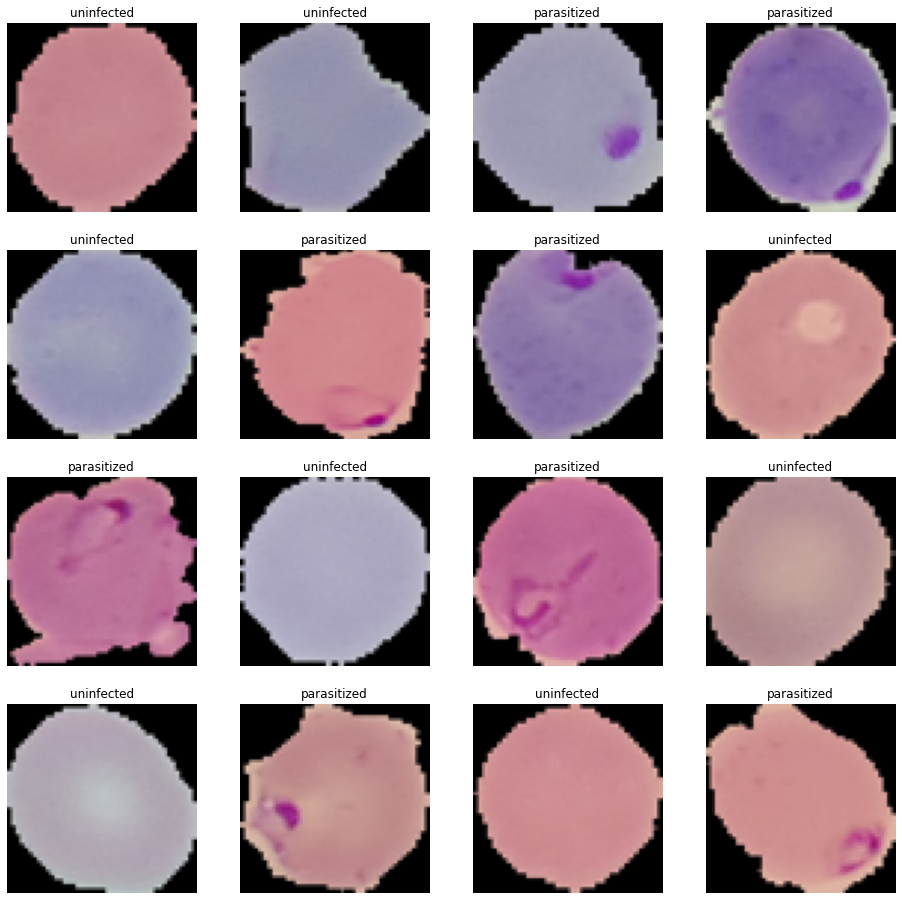

In [14]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

Observations and insights: 
By plotting the images we can see the appearance of the cells.

In some cases it is easy to identify the parasitized ones due to the pink / violet formation inside the cell.

But in some cases it is more difficult.

This is only a very small sample of the data set, so it is easy to imagine that there are probably many cases where the classification into parasitized or uninfected is difficult to distinguish for an inexperienced/untrained person. Therefore, a well-functioning model will be of great help in the fight against malaria, as it provides an accurate, inexpensive and rapid diagnosis.


Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

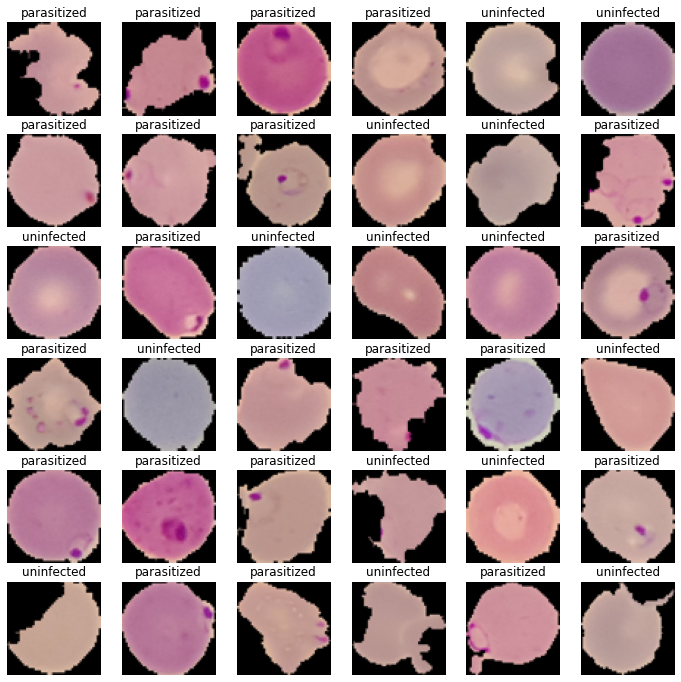

In [15]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate
np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, test_images.shape[0], 1))

    if test_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(test_images[index])

    plt.axis('off')


Observations and insights:

We can see here that some characteristics such as shape do not seem to be relevant for classification, while others such as color or the presence/absence of structures inside the cell seem to be more relevant to identify if it is parasitized or uninfected.


### 3.2 Normalizing the images

In [16]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
n_train_images = (train_images/255).astype('float32')

n_test_images = (test_images/255).astype('float32')

###3.3 Plotting the mean images for parasitized and uninfected

In [17]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

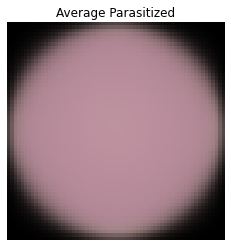

In [18]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(n_train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

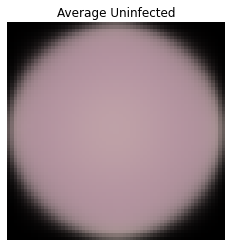

In [19]:
# Similarly write the code to find the mean image of uninfected

# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
uninfected_data = []  # Create a list to store the uninfected data

for img, label in zip(n_train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected') 


Observations and insights:

It is not easy to find differences between the mean image of the parasitized and uninfected sets.

However, we can appreciate a slightly more intense "pinkish" color in the infected cells.

This more intense "pinkish" color in the parasitized mean image is probably due to the fact that many of the malaria-infected cells show structures in their interior that tend to have a more intense pink color than the rest of the cytoplasm. In each cell this structure has a different shape and is in a different position, so, on average, they have shifted the overall color value to a more intense one generating that effect as if it were a pink filter. 

This allows us to consider color as a relevant feature for the model performance.

##**4. Data Pre-processing**


### 4.2 Converting RGB to HSV of Images using OpenCV

RGB is an image format that considers colors based on the ratio of red, green and blue in a given color, but does not allow us to separate color information from luminance. 

On the other hand, the HSV: Hue, Saturation and Value (or Brightness) color model does allow us to separate the luminance of the image from the color information.

As mentioned above, color seems to play a role in classifying parasitized or uninfected cells.

Therefore, the transformation from RGE to HSV may help the model to perform better.



<b> Converting the train data

In [20]:
import cv2

gfx_train=[]   # to hold the HSV image array

for i in np.arange(0, 24958, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx_train.append(a)

gfx_train = np.array(gfx_train)

In [21]:
gfx_train.shape

(24958, 64, 64, 3)

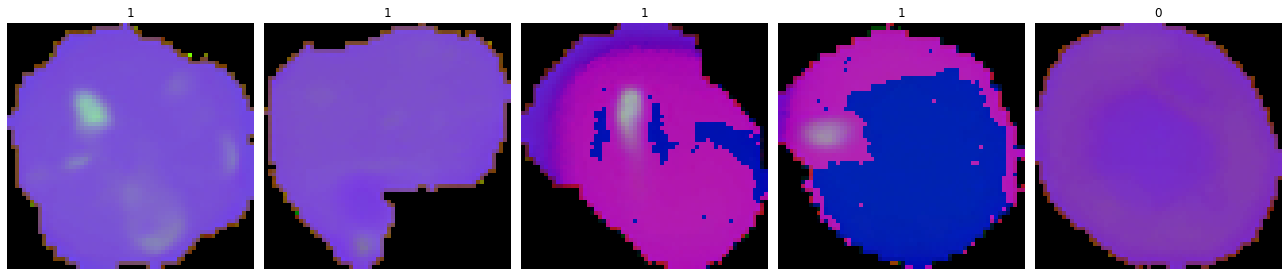

In [22]:
viewimage = np.random.randint(1, 24958, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx_train[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()


<b> Converting the test data

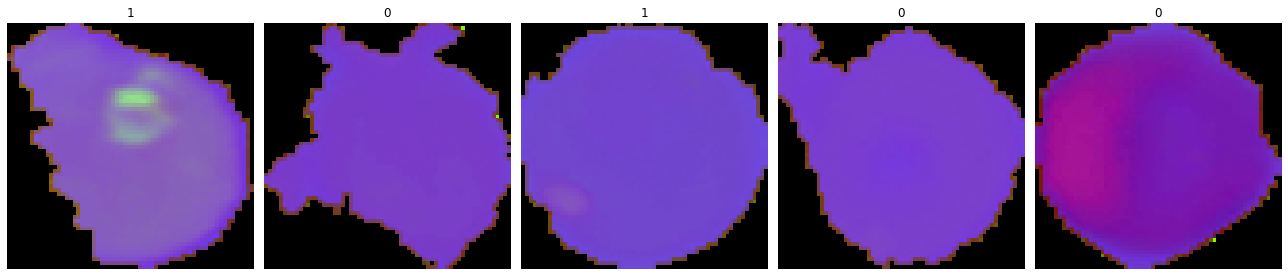

In [23]:
# Similarly you can visualize for the images in the test data

gfx_test=[]   # to hold the HSV image array

for i in np.arange(0, 2600, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx_test.append(a)

gfx_test = np.array(gfx_test)

viewimage = np.random.randint(1, 2600, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx_test[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

Observations and insights:

We can appreciate after the transformation that there is a  light green color that is pressent in all the parasitized cells shown. This might be a clear indicator of the presence of the maralia parasite in the blood cell. 


Mean image of Parasitized and Uninfected cell with the HSV transformation. 

As we have done with the raw images, we will plot an average parasitized and uninfected cell with the HSV image format, and see how they look like. This might give us an idea of the effect of the transformation.

In [24]:
print(gfx_train.max())
print(gfx_train.min())

255
0


In [25]:

# Try to normalize the gfx train and gfx test images by dividing it by 255 and convert them to float32 using astype function
n_gfx_train = (gfx_train/255).astype('float32')

n_gfx_test = (gfx_test/255).astype('float32')

Mean image of HSV parasitized cell

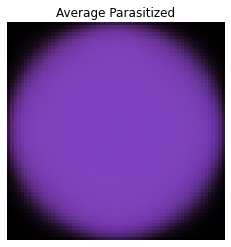

In [26]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
gfx_parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(n_gfx_train, train_labels):

        if label == 1:
              
              gfx_parasitized_data.append([img])          

gfx_parasitized_mean = find_mean_img(np.array(gfx_parasitized_data), 'Parasitized')   # find the mean

Mean image of HSV uninfected cell

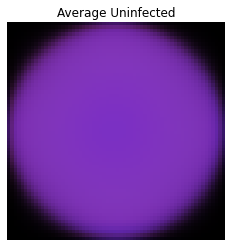

In [27]:
# Similarly write the code to find the mean image of uninfected

# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
gfx_uninfected_data = []  # Create a list to store the uninfected data

for img, label in zip(n_gfx_train, train_labels):

        if label == 0:
              
              gfx_uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(gfx_uninfected_data), 'Uninfected') 


Observations and insights: 
The effect is very similar to the one described before in section 3.3 (mean average of parasitized and uninfected cells): the uninfected image is slightly darker than the parasitized one. 


### 4.3 Processing Images using Gaussian Blurring

Gaussian Blurring on train data

Gaussian blurring is a way to apply a low pass filtering. It helps to reduce noise from the image.

It may help the model to perform better as it reduces noises that can challenge the model.



In [28]:
gbx_train = []  # To hold the blurred images

for i in np.arange(0, 24958, 1):

  b = cv2.GaussianBlur(n_train_images[i], (5, 5), 0)

  gbx_train.append(b)

gbx_train = np.array(gbx_train)

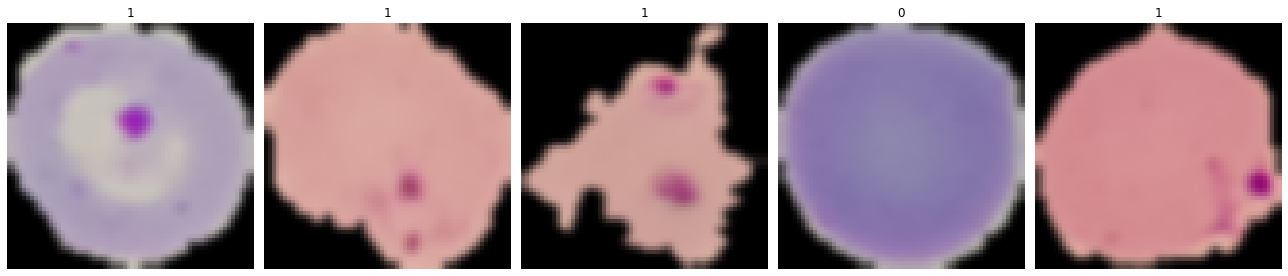

In [29]:
viewimage = np.random.randint(1, 24958, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx_train[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

Gaussian Blurring on test data

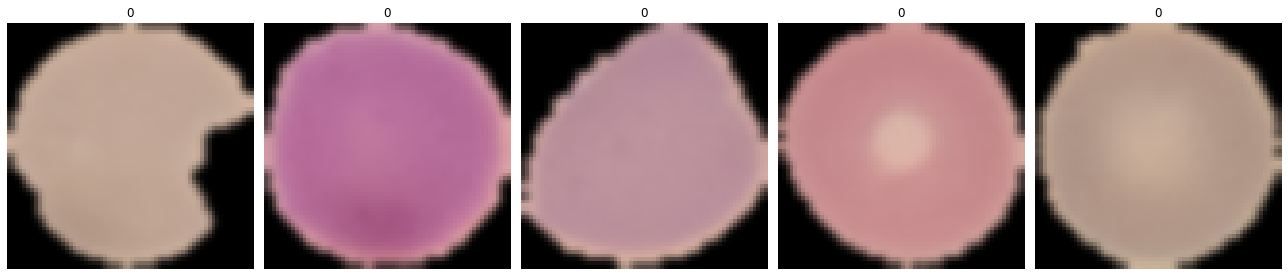

In [30]:
# Similarly you can apply Gaussian blurring for the images in the test data

gbx_test = []  # To hold the blurred images

for i in np.arange(0, 2600, 1):

  b = cv2.GaussianBlur(n_test_images[i], (5, 5), 0)

  gbx_test.append(b)

gbx_test = np.array(gbx_test)

viewimage = np.random.randint(1, 2600, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx_test[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

## **5. Proposed approach**


###**Potential techniques:**





ANN (Artificial Neural Network). We will flatten the images to convert them into 1-D arrays before we feed them to the Fully Connected Layers.

CNN (Convolutional Neural Networks) with different settings. Possible addition of max pooling layers and dropout layers in case of overfitting. 

Transfer Learning. We want to see if it can help the model by transferring the learnings obtained from processing millions of images to our model. It is possible that these learnings will be useful to our model in classifying red blood cell images.

Data augmentation. This is: applying small transformations to the training images such as rotation, flipping, changing brightness, contrast, saturation and/or hue.




###**Overall solution design:**
 


Exploratory Data Analysis

Data preprocessing

Model 1 ANN building, training and evaluation.

Model 2 CNN building, training and evaluation.

Model 3 CNN building, training and evaluation.

Model 4 With Transfer Learning building, training and evaluation.

Data augmentation if necessary and re training best performing models.




###**Measures of success:** 



**Accuracy**. It measures the percentage of cases that the model has classified correctly. Since the classes are balanced, it is a useful metric. But it is always necessary to consider it in relation to other metrics such as precision and recall.

**Precision**. It will give us an idea of what is really happening when the model classifies an image as positive. This is: the higher the precision, the less likely is the model to give us false positives (classifying an uninfected cell as parasitized). This is relevant to avoid giving unnecessary treatment to patients that might be healthy or suffering from some disease different from malaria. Also helps in saving malaira medicine for the real cases of malaria. 

**Recall**. It will give us an idea of how many of the total parasitized cells are we able to identify. This is: the higher the recall, the less likely is the model to give us false negatives (classifying an parasitized cell as uninfected). This is very important in order to correctly diagnose the individuals infected with malaria and thus give appropriate malaria treatment to them. 

**F1-Score**. The F1 value is used to combine the precision and recall measures into a single value. This is practical because it makes it easier to compare the combined performance of accuracy and completeness between various solutions.

**NOTE** Although all of the measures gives us an idea of how is the model performing, out of the four measures of success mentioned, Recall and Precision will be considered the most important ones for this particular problem. 



## **6. Must run cells**
These cells correspond to milestone 2. However, they have been separated to facilitate their execution and allow their changes to be available in case you want to execute a single model without running the whole code. 
To run the models individually it is required to run the entire "Milestone 1" section (which already includes this "Must run cells" section) before running any model individually.  

#### One Hot Encoding on the train and test labels


In [31]:
# Encoding Train Labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels,2)
# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels,2)

display(train_labels)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

#### Function to plot train and validation accuracy, loss and validation loss.



In [32]:
# Function to plot train and validation accuracy, loss and validation loss.
def plot_accuracy(history,title):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["loss"], label = "train_loss", ls = '-')

    plt.plot(np.arange(0, N), history.history["val_loss"], label = "val_loss", ls = '-')
    
    plt.title(title)
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy and loss")
    
    plt.legend( loc="lower right")

#### Importing the required libraries for building and training our Model

In [33]:
# Clearing backend

import tensorflow as tf

from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU, AveragePooling2D, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

#### Function to Plot the Confusion Matrix and printing the classification report

In [34]:
def cm(modelx, testx, testy, xyticklabeles,ylabel,xlabel, title, classreport):
  # Plot the confusion matrix and generate a classification report for the model
  pred = modelx.predict(testx)

  pred = np.argmax(pred, axis = 1) 

  y_true = np.argmax(testy, axis = 1)

  if classreport == True:
    # Printing the classification report
    print(classification_report(y_true, pred))
    
  else: 
      pass

  # Plotting the heatmap using confusion matrix

  cm = confusion_matrix(y_true, pred)

  plt.figure(figsize = (8, 5))

  sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = xyticklabeles, yticklabels = xyticklabeles)

  plt.title(title)
  plt.ylabel(ylabel)

  plt.xlabel(xlabel)

  plt.show()





# **Milestone 2**


## **1. Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

### 1.1 Building the model


Building the model

In [35]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

Compiling the model

In [36]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Using Callbacks 

In [37]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_accuracy', save_best_only = True)]

### 1.2 Fit and train the Model

In [38]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(n_train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)


Epoch 1/20
624/624 [==============================] - 15s 6ms/step - loss: 0.4245 - accuracy: 0.7922 - val_loss: 0.2176 - val_accuracy: 0.9093
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1190 - accuracy: 0.9591 - val_loss: 0.0877 - val_accuracy: 0.9880
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0897 - accuracy: 0.9709 - val_loss: 0.0608 - val_accuracy: 0.9906
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0781 - accuracy: 0.9736 - val_loss: 0.0825 - val_accuracy: 0.9826
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0734 - accuracy: 0.9769 - val_loss: 0.0655 - val_accuracy: 0.9866


 Saving the model

In [39]:
#saving the model:
model.save("basemodel.h5")


###1.3 Evaluating the model on test data


Plotting the train and validation curves

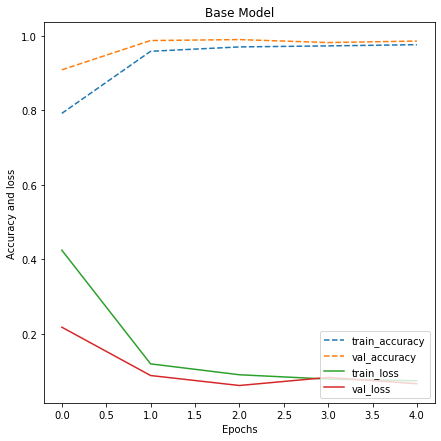

In [40]:
plot_accuracy(history,"Base Model")

1.3.1 Accuracy on test data

In [41]:
accuracy = model.evaluate(n_test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0705 - accuracy: 0.9781

 Test_Accuracy:- 0.9780769348144531


Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



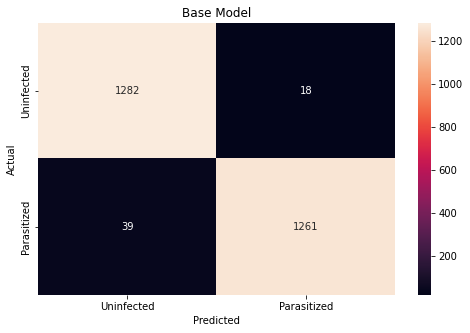

In [42]:
cm(model, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Base Model",True)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

Observations and Insights:

The model performs quite well with an accuracy of 97.8%. However, this information is not enough. We need to know how it classifies the cells that are truly infected. 
In the confusion matrix, we can see how out of 1300 images of parasitized cells it classified 1253 well and 39 wrongly, which represents a 3.6% error in the case of infected people. It is possible that this result is better than any achieved by humans, particularly if we consider inter-observer variability. However, if we consider that this result would imply not diagnosing (and therefore not treating, 39 out of 1300 infected), then we will know that the problem requires looking for the best possible solution. 
We will try to find alternatives that reduce this type of error (classifying a sick person as healthy) without raising too much the opposite error (classifying a healthy person as sick). 

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

##**2. ANN Base Model**



In [43]:
backend.clear_session() # Clearing the backend for new model

### 2.0 Pre-processing images

Transforming  Train RGB images into gray scale images to flatten them** 


In [44]:
# Transforming  Train RGB images into gray scale images to flatten them 

from matplotlib import pyplot as plt


gray_train_images = []

for img in train_images:
  
  i = (0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2])

  gray_train_images.append(i)

gray_train_images = np.array(gray_train_images)

gray_train_images.shape

(24958, 64, 64)

In [45]:
# Transforming  Test RGB images into gray scale images to flatten them 

gray_test_images = []

for img in test_images:
  
  i = (0.2989 * img[:,:,0] + 0.5870 * img[:,:,1] + 0.1140 * img[:,:,2])

  gray_test_images.append(i)

gray_test_images = np.array(gray_test_images)

gray_test_images.shape

(2600, 64, 64)

Visualizing pre pre-processed images

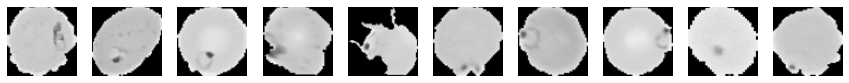

label for each of the above image: [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [46]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (15, 15))

for i in range(10):

    plt.subplot(10, 10, i+1)

    plt.imshow(gray_train_images[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (train_labels[0:10]))

Reshaping 2D image into 1D array

In [47]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array

gray_train_images = gray_train_images.reshape(gray_train_images.shape[0], 4096)

gray_test_images = gray_test_images.reshape(gray_test_images.shape[0], 4096)


Normalizing inputs from 0-255 to 0-1

In [48]:
# Normalize inputs from 0-255 to 0-1

gray_train_images = gray_train_images.astype('float32') / 255

print("gray train images:", gray_train_images.shape)

gray_test_images = gray_test_images.astype('float32') / 255

print("gray test images:", gray_test_images.shape)

gray train images: (24958, 4096)
gray test images: (2600, 4096)


In [49]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### 2.1 Building the model

In [50]:
# Define the model

def nn_model():

    ann_model = Sequential() 

    # Add layers as per the architecture mentioned above in the same sequence
    
    ann_model.add(Dense(units = 64, activation = 'relu', input_shape = (4096, )))

    ann_model.add(Dense(units = 32, activation = 'relu'))

    ann_model.add(Dropout(0.2))

    ann_model.add(Dense(units = 32, activation = 'relu'))
    
    ann_model.add(Dense(2, activation = 'softmax'))

    adam = optimizers.Adam(learning_rate = 0.001)
      
    # Compile the model


    ann_model.compile(optimizer = adam, loss = 'categorical_crossentropy',  metrics = ['accuracy'])
    
    return ann_model

In [51]:
# Build the model

ann_base_model = nn_model()

In [52]:
ann_base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                262208    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 265,410
Trainable params: 265,410
Non-trainable params: 0
_________________________________________________________________


### 2.2 Fit and train the model


In [53]:
history_ann_base_model = ann_base_model.fit(gray_train_images, train_labels, validation_split = 0.1875, batch_size = 256, verbose = 1, epochs = 100)


Epoch 1/100
80/80 [==============================] - 1s 7ms/step - loss: 0.6741 - accuracy: 0.6105 - val_loss: 0.7962 - val_accuracy: 0.2953
Epoch 2/100
80/80 [==============================] - 0s 5ms/step - loss: 0.6541 - accuracy: 0.6326 - val_loss: 0.9701 - val_accuracy: 0.0395
Epoch 3/100
80/80 [==============================] - 0s 5ms/step - loss: 0.6460 - accuracy: 0.6457 - val_loss: 0.8546 - val_accuracy: 0.3314
Epoch 4/100
80/80 [==============================] - 0s 5ms/step - loss: 0.6457 - accuracy: 0.6472 - val_loss: 0.7977 - val_accuracy: 0.3859
Epoch 5/100
80/80 [==============================] - 0s 5ms/step - loss: 0.6417 - accuracy: 0.6499 - val_loss: 0.9680 - val_accuracy: 0.2139
Epoch 6/100
80/80 [==============================] - 0s 5ms/step - loss: 0.6377 - accuracy: 0.6537 - val_loss: 0.8767 - val_accuracy: 0.2985
Epoch 7/100
80/80 [==============================] - 0s 5ms/step - loss: 0.6319 - accuracy: 0.6574 - val_loss: 0.8174 - val_accuracy: 0.4036
Epoch 8/100
8

In [141]:
#saving the model:
model.save("ann_base_model.h5")


### 2.3 Evaluating the model on test data

Plotting the train and validation curves

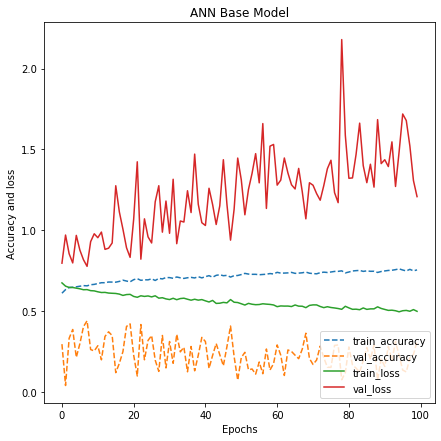

In [54]:
plot_accuracy(history_ann_base_model, "ANN Base Model")

Test Accuracy

In [55]:
accuracy_ann = ann_base_model.evaluate(gray_test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy_ann[1])

82/82 [==============================] - 0s 2ms/step - loss: 0.7767 - accuracy: 0.6073

 Test_Accuracy:- 0.6073076725006104


Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.83      0.27      0.41      1300
           1       0.56      0.94      0.71      1300

    accuracy                           0.61      2600
   macro avg       0.70      0.61      0.56      2600
weighted avg       0.70      0.61      0.56      2600



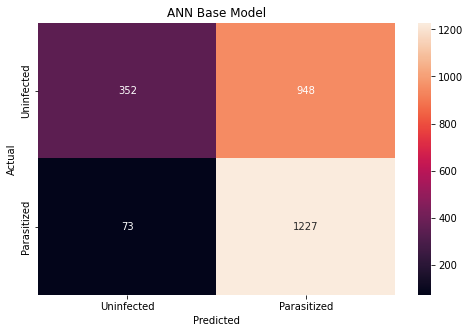

In [56]:
cm(ann_base_model, gray_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","ANN Base Model", True)


Observations and Insights:

This model performs poorly. It classifies most of the images as parasitic, which would generate a huge expenditure of a scarce resource such as anti-parasitic medicine. In fact, if the model only classified everything as parasitic, it would have had an accuracy of 0.50 (obtained, 0.56), so it is definitely bad model for this task.


It is likely that, as mentioned above, color is a relevant feature for classification, so using grayscale images implies the loss of key information, and thus, a poor performance.


## **3. Model 1**
####<b> Trying to improve the performance of our model by adding new layers


In [57]:
backend.clear_session() # Clearing the backend for new model

#### 3.1 Building the Model

In [58]:
# Creating sequential model
model1 = Sequential()


# Build the model here and add new layers

# 1st Block:
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model1.add(MaxPooling2D(pool_size = 2))

# 1st Dropout Layer:
model1.add(Dropout(0.2))

# 2nd Block:
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))

# 2nd Dropout Layer:
model1.add(Dropout(0.2))

# 3rd Block:
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))

# 3rd Dropout Layer:
model1.add(Dropout(0.2))

# Flattening layer:
model1.add(Flatten())

# Fully connected layer:
model1.add(Dense(512, activation = "relu"))

# 4th Dropout Layer:
model1.add(Dropout(0.4))

# Classifyer: 
model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

Compiling the model

In [59]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Using Callbacks

In [60]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_accuracy', save_best_only = True)]

### 3.2 Fit and Train the model

In [61]:
history1 = model1.fit(n_train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 4s 6ms/step - loss: 0.4933 - accuracy: 0.7576 - val_loss: 0.1821 - val_accuracy: 0.9329
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1432 - accuracy: 0.9470 - val_loss: 0.1115 - val_accuracy: 0.9794
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.1171 - accuracy: 0.9599 - val_loss: 0.1269 - val_accuracy: 0.9792
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0946 - accuracy: 0.9693 - val_loss: 0.1019 - val_accuracy: 0.9878
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0816 - accuracy: 0.9736 - val_loss: 0.0936 - val_accuracy: 0.9836
Epoch 6/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0713 - accuracy: 0.9770 - val_loss: 0.0692 - val_accuracy: 0.9862
Epoch 7/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0729 - accuracy: 0.9769 - val_loss: 0.0670 - val_accuracy: 0.9860
Epoch 

In [64]:
#saving the model:
model1.save("model1.h5")

### 3.3 Evaluating the model

Plotting the train and the validation curves

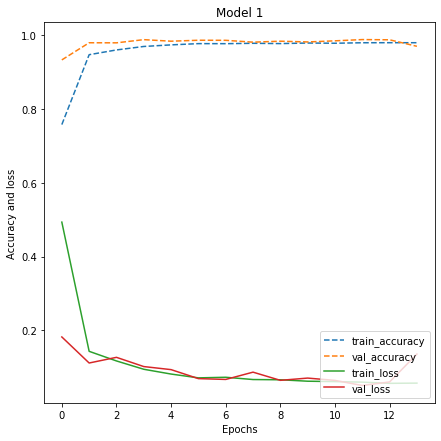

In [62]:
plot_accuracy(history1, "Model 1")

Test Accuracy

In [63]:
accuracy1 = model1.evaluate(n_test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9781

 Test_Accuracy:- 0.9780769348144531


Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



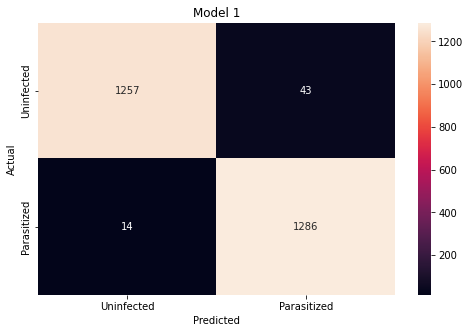

In [65]:
cm(model1, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 1",True)

Observations and Insights:

We have here a model that performs better. The base model diagnosed 39 people as healthy, when in fact they were sick. This model makes that same error only 14 times in 1300. This means that there are 25 people out of 1300 infected who would recive treatment thanks to this improvement in the model would be correctly diagnosed, and treated. 

Another important consideration is that 43 people were incorrectly diagnosed as infected and treated for malaria even though that was not the case. This represents a waste of time, energy and medicine. All of them very valuable and scarce resources.

We need to find a model that prioritizes to classify correctly the malaria infected cells, but also who does not missclassifies healthy cells as infected, so antimalarial medicine is not wasted.

## **4. Model 2 with Batch Normalization and LeakyRelu**

In [66]:
backend.clear_session() # Clearing the backend for new model

### 4.1 Building the Model

In [67]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

# Build the model here and add new layers

# 1st Block:
model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model2.add(LeakyReLU(0.1))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = 2))

# 1st Dropout Layer:
model2.add(Dropout(0.3))

# 2nd Block:
model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size = 2))

# 2nd Dropout Layer:
model2.add(Dropout(0.3))

# 3rd Block:
model2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size = 2))

# 3rd Dropout Layer:
model2.add(Dropout(0.3))

# Flattening layer:
model2.add(Flatten())

# Fully connected layer:
model2.add(Dense(512))
model2.add(LeakyReLU(0.3))

# 4th Dropout Layer:
model2.add(Dropout(0.4))

# Classifyer: 
model2.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

adam = optimizers.Adam(learning_rate = 0.005)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4128      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

Compiling the model

In [68]:
model2.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

Using callbacks

In [69]:
'''

create the callbacks similarly as done in the base model
As callbacks will help us in saving our checkpoints and stopping at an accuracy where the model doesnot seem to improve

'''
callbacks = [EarlyStopping(monitor = 'val_accuracy', patience = 3),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_accuracy', save_best_only = True)]

### 4.2 Fit and train the model

In [70]:
history2 = model2.fit(n_train_images, train_labels, batch_size = 8, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
2496/2496 [==============================] - 13s 5ms/step - loss: 0.4455 - accuracy: 0.8217 - val_loss: 0.2645 - val_accuracy: 1.0000
Epoch 2/20
2496/2496 [==============================] - 12s 5ms/step - loss: 0.2857 - accuracy: 0.9173 - val_loss: 0.1799 - val_accuracy: 0.9958
Epoch 3/20
2496/2496 [==============================] - 12s 5ms/step - loss: 0.2959 - accuracy: 0.9126 - val_loss: 0.0575 - val_accuracy: 0.9960
Epoch 4/20
2496/2496 [==============================] - 12s 5ms/step - loss: 0.2894 - accuracy: 0.9141 - val_loss: 0.0347 - val_accuracy: 0.9996


In [140]:
#saving the model:
model2.save("model2.h5")

### 4.3 Evaluating the model

Plotting the train and validation curves

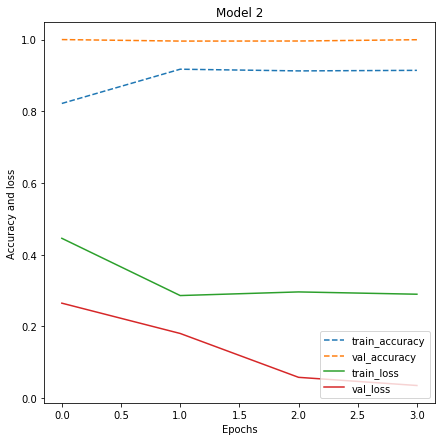

In [72]:
# Plotting the accuracies and loss
plot_accuracy(history2, "Model 2")

Test Accuracy

In [73]:
# Evaluate the model to calculate the accuracy

accuracy2 = model2.evaluate(n_test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy2[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.8342

 Test_Accuracy:- 0.8342307806015015


Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1300
           1       1.00      0.67      0.80      1300

    accuracy                           0.83      2600
   macro avg       0.87      0.83      0.83      2600
weighted avg       0.87      0.83      0.83      2600



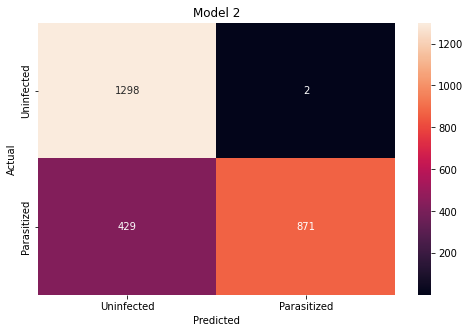

In [74]:
cm(model2, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 2",True)

Observations and insights:

Here we can see how the model performs slightly better in some aspects, while getting worse in others. This gives us the idea of the trade off that is at play in the ranking between accuracy and recall. 

Bringing the issue to the terms of our problem. It is a matter of finding the balance between the lives that can be saved by adequate treatment in time and the rationalization of the drug so that it is administered only to infected persons and thus available to the truly infected. That is, not treating people who are not infected with malaria or who are suffering from a different disease and require another treatment.




In [75]:
backend.clear_session() # Clearing the backend for new model

## **5. Model 2B**
When a model has the same architecture but only a difference in the parameters, or in the training batch. we will keep the model number and add a differencing name such as "B" or the transformation done to the training and testing dataset (such as "HSV", "GB" for gaussian blurring, etc)

### 5.1 Building the Model

In [76]:
model2b = Sequential()

model2b.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

# Build the model here and add new layers

# 1st Block:
model2b.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model2b.add(LeakyReLU(0.1))
model2b.add(BatchNormalization())
model2b.add(MaxPooling2D(pool_size = 4))

# 1st Dropout Layer:
model2b.add(Dropout(0.25))

# 2nd Block:
model2b.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model2b.add(LeakyReLU(0.1))
model2b.add(MaxPooling2D(pool_size = 4))

# 2nd Dropout Layer:
model2b.add(Dropout(0.25))

# 3rd Block:
model2b.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model2b.add(LeakyReLU(0.1))
model2b.add(MaxPooling2D(pool_size = 4))

# 3rd Dropout Layer:
model2b.add(Dropout(0.25))

# Flattening layer:
model2b.add(Flatten())

# Fully connected layer:
model2b.add(Dense(512))
model2b.add(LeakyReLU(0.1))

# 4th Dropout Layer:
model2b.add(Dropout(0.25))

# Classifyer: 
model2b.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

adam = optimizers.Adam(learning_rate = 0.005)

model2b.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4128      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0

Compiling the model

In [77]:
model2b.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

Using callbacks

In [78]:
'''

create the callbacks similarly as done in the base model
As callbacks will help us in saving our checkpoints and stopping at an accuracy where the model doesnot seem to improve

'''
callbacks = [EarlyStopping(monitor = 'val_accuracy', patience = 3),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_accuracy', save_best_only = True)]

### 5.2 Fit and train the model

In [79]:
history2b = model2b.fit(n_train_images, train_labels, batch_size = 64, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 5s 12ms/step - loss: 0.2517 - accuracy: 0.8922 - val_loss: 11.5345 - val_accuracy: 0.0022
Epoch 2/20
312/312 [==============================] - 3s 11ms/step - loss: 0.1089 - accuracy: 0.9685 - val_loss: 0.0504 - val_accuracy: 0.9874
Epoch 3/20
312/312 [==============================] - 3s 11ms/step - loss: 0.1097 - accuracy: 0.9677 - val_loss: 0.0652 - val_accuracy: 0.9924
Epoch 4/20
312/312 [==============================] - 3s 11ms/step - loss: 0.0968 - accuracy: 0.9723 - val_loss: 0.0749 - val_accuracy: 0.9804
Epoch 5/20
312/312 [==============================] - 3s 11ms/step - loss: 0.1107 - accuracy: 0.9664 - val_loss: 0.0511 - val_accuracy: 0.9906
Epoch 6/20
312/312 [==============================] - 3s 11ms/step - loss: 0.0931 - accuracy: 0.9704 - val_loss: 0.1167 - val_accuracy: 0.9688


In [80]:
#saving the model:
model2b.save("model2b.h5")

### 5.3 Evaluating the model

Plotting the train and validation curves

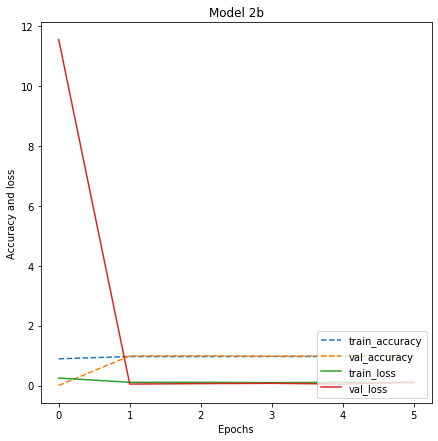

In [81]:
# Plotting the accuracies and loss
plot_accuracy(history2b, "Model 2b")

Test Accuracy

In [82]:
# Evaluate the model to calculate the accuracy

accuracy2b = model2b.evaluate(n_test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy2b[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0854 - accuracy: 0.9781

 Test_Accuracy:- 0.9780769348144531


Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1300
           1       0.96      1.00      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



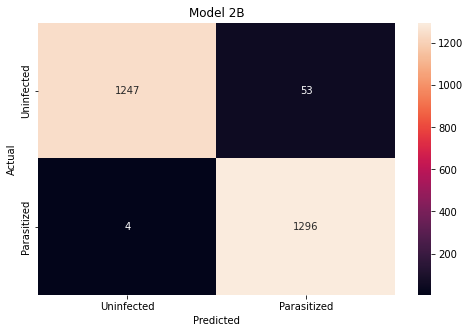

In [83]:
cm(model2b, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 2B",True)

Ovservations and perceptions: 

Here we can see that the model works very well. Of the 1,300 images of parasitized cells, the model only failed in 4 of them classifying them as uninfected (0.3%). 

As for the classification of uninfected cells, although the error is larger 53 out of 1300 (4.1%) this error is more tolerable as it has a much lower relative cost. 



## **6. Model 2 (trained and tested with HSV images)**

We are using the images generated in the preprossesing stage by converting the original resized images from RGB to HSV. 

Althoug for the human eye, the mean HSV parasitized images does not seem to differ from the mean HSV uninfected cell, we will still give it a try and see how the model performs when trained with this HSV images.  

#### 6.1 Building the model

In [84]:
backend.clear_session() # Clearing the backend for new model

In [85]:
model2gf = Sequential()

model2gf.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

# Build the model here and add new layers

# 1st Block:
model2gf.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model2gf.add(LeakyReLU(0.1))
model2gf.add(BatchNormalization())
model2gf.add(MaxPooling2D(pool_size = 4))

# 1st Dropout Layer:
model2gf.add(Dropout(0.2))

# 2nd Block:
model2gf.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model2gf.add(LeakyReLU(0.1))
model2gf.add(MaxPooling2D(pool_size = 4))

# 2nd Dropout Layer:
model2gf.add(Dropout(0.2))

# 3rd Block:
model2gf.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model2gf.add(LeakyReLU(0.1))
model2gf.add(MaxPooling2D(pool_size = 4))

# 3rd Dropout Layer:
model2gf.add(Dropout(0.2))

# Flattening layer:
model2gf.add(Flatten())

# Fully connected layer:
model2gf.add(Dense(512))
model2gf.add(LeakyReLU(0.1))

# 4th Dropout Layer:
model2gf.add(Dropout(0.2))

# Classifyer: 
model2gf.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

adam = optimizers.Adam(learning_rate = 0.005)

model2gf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4128      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0

In [86]:
model2gf.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

In [87]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_accuracy', save_best_only = True)]

#### 6.2 Fit and train the model

In [88]:
history2gf = model2gf.fit(n_gfx_train, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 6s 8ms/step - loss: 0.1737 - accuracy: 0.9407 - val_loss: 0.2137 - val_accuracy: 0.9541
Epoch 2/20
624/624 [==============================] - 5s 7ms/step - loss: 0.1109 - accuracy: 0.9674 - val_loss: 0.0965 - val_accuracy: 0.9752
Epoch 3/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0985 - accuracy: 0.9688 - val_loss: 0.0615 - val_accuracy: 0.9876
Epoch 4/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0934 - accuracy: 0.9719 - val_loss: 0.1827 - val_accuracy: 0.9391
Epoch 5/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0897 - accuracy: 0.9727 - val_loss: 0.0666 - val_accuracy: 0.9802


In [139]:
#saving the model:
model2gf.save("model2gf.h5")

#### 6.3 Evaluating the model


Plotting the train and validation curves

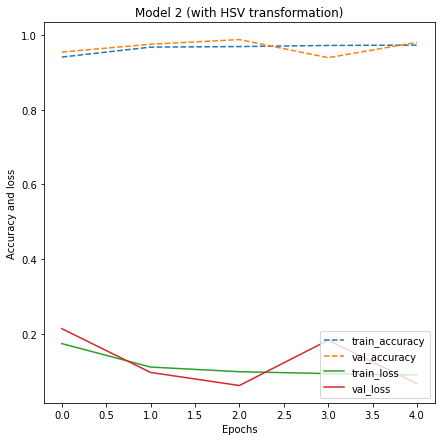

In [90]:
# Plotting the accuracies and loss
plot_accuracy(history2gf, "Model 2 (with HSV transformation)")

Test Accuracy

In [91]:
# Evaluate the model to calculate the accuracy

accuracy2gf = model2gf.evaluate(n_gfx_test, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy2gf[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9823

 Test_Accuracy:- 0.9823076725006104


Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



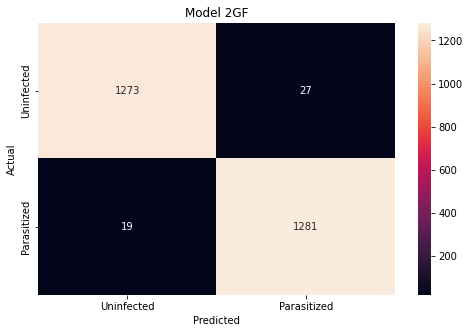

In [92]:
cm(model2gf, n_gfx_test, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 2GF", True)

Observations and reflections: 

This is an interesting model. It works quite well (0.982 accuracy), It makes a very small amount of classification errors when the image belongs to a truly parasitized cell (19).But it is not as goos as  the Model 2.

## **7. Model 2GB (trained an tested with images pre-processed with gaussian blurring)**



We are using the images generated in the preprossesing stage by applying a gaussian blur to th images. 

We will see if this low pass filter can improve the performance of model 2B.

In [93]:
backend.clear_session() # Clearing backend for new model

### 7.1 Building the Model

In [94]:
model2gb= Sequential()

model2gb.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

# Build the model here and add new layers

# 1st Block:
model2gb.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model2gb.add(LeakyReLU(0.1))
model2gb.add(BatchNormalization())
model2gb.add(MaxPooling2D(pool_size = 4))

# 1st Dropout Layer:
model2gb.add(Dropout(0.2))

# 2nd Block:
model2gb.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model2gb.add(LeakyReLU(0.1))
model2gb.add(MaxPooling2D(pool_size = 4))

# 2nd Dropout Layer:
model2gb.add(Dropout(0.2))

# 3rd Block:
model2gb.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model2gb.add(LeakyReLU(0.1))
model2gb.add(MaxPooling2D(pool_size = 4))

# 3rd Dropout Layer:
model2gb.add(Dropout(0.2))

# Flattening layer:
model2gb.add(Flatten())

# Fully connected layer:
model2gb.add(Dense(512))
model2gb.add(LeakyReLU(0.1))

# 4th Dropout Layer:
model2gb.add(Dropout(0.2))

# Classifyer: 
model2gb.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

adam = optimizers.Adam(learning_rate = 0.005)

model2gb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4128      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0

In [95]:
model2gb.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

In [96]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_accuracy', save_best_only = True)]

### 7.2 Fit and Train the model

In [97]:
history2gb = model2gb.fit(gbx_train, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 5s 8ms/step - loss: 0.2001 - accuracy: 0.9226 - val_loss: 0.0993 - val_accuracy: 0.9728
Epoch 2/20
624/624 [==============================] - 5s 7ms/step - loss: 0.1183 - accuracy: 0.9635 - val_loss: 0.0336 - val_accuracy: 0.9948
Epoch 3/20
624/624 [==============================] - 5s 7ms/step - loss: 0.1072 - accuracy: 0.9670 - val_loss: 0.1119 - val_accuracy: 0.9774
Epoch 4/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0990 - accuracy: 0.9696 - val_loss: 0.1512 - val_accuracy: 0.9698


In [138]:
# Saving the model:
model2gb.save("model2gb.h5")

### 7.3 Evaluating the model

Plot the train and validation curves

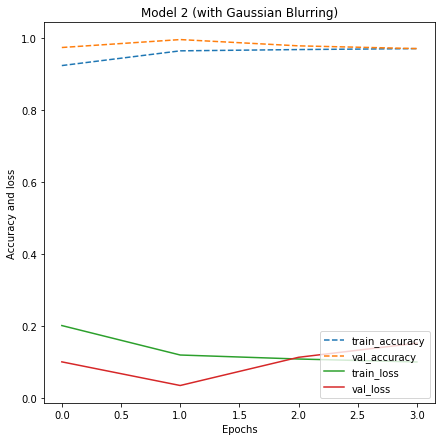

In [99]:
# Plotting the accuracies and loss
plot_accuracy(history2gb, "Model 2 (with Gaussian Blurring)")

Test accuracy

In [100]:
# Evaluate the model to calculate the accuracy

accuracy2gb = model2gb.evaluate(gbx_test, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy2gb[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0989 - accuracy: 0.9738

 Test_Accuracy:- 0.9738461375236511


Generate classificarion report and confuision matrix

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1300
           1       0.90      1.00      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.94      0.94      2600
weighted avg       0.95      0.94      0.94      2600



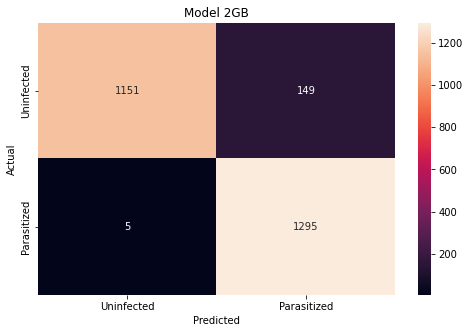

In [101]:
cm(model2gb, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 2GB",True)

Observations and Insights:

The model performs well, identifing parasitized cells but it does not on identifying uninfected cells which leads to de waste of time, energy, nmedicine and other resources

## **8. Model 3 with Data Augmentation**

In [102]:
backend.clear_session() # Clearing backend for new model

 ### 8.0 Using image data generator

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.1, rotation_range = 20, shear_range = 30, rescale=1./255, brightness_range=[0.5,1.5],
                                   channel_shift_range=0.06)
val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

Visualizing Augmented images

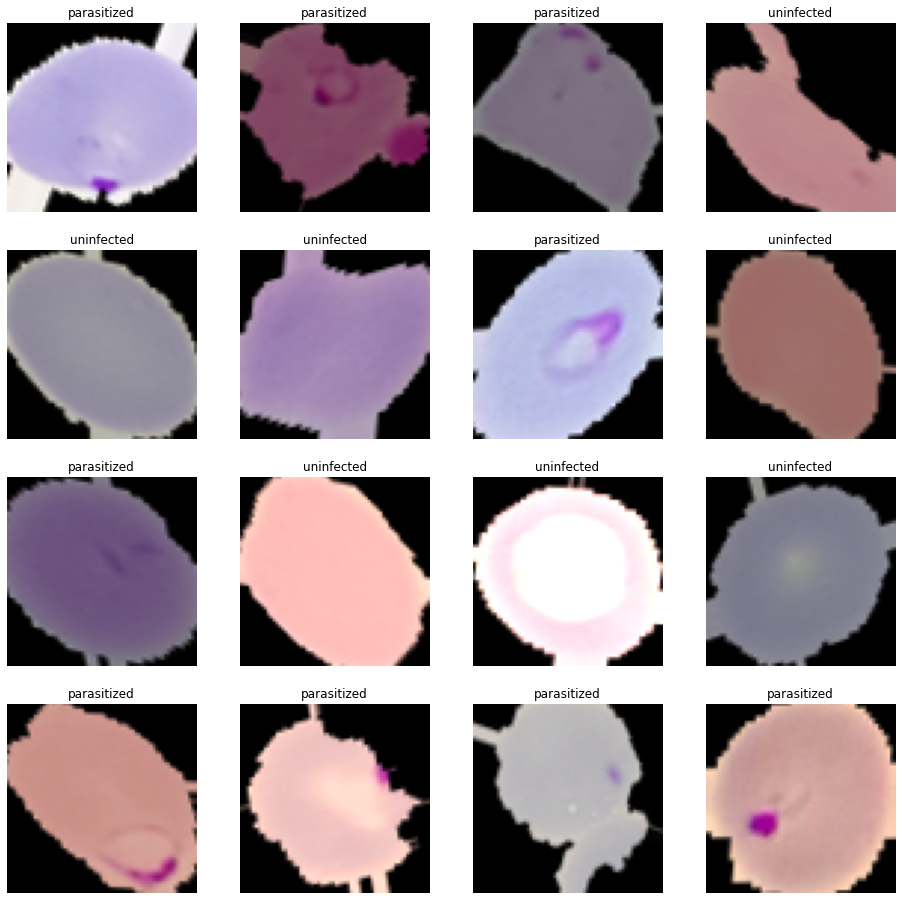

In [104]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

Observations and insights: ____

### 8.1 Building the Model

In [105]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

# Build the model here and add new layers

# 1st Block:
model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model3.add(LeakyReLU(0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = 4))

# 1st Dropout Layer:
model3.add(Dropout(0.25))

# 2nd Block:
model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size = 4))

# 2nd Dropout Layer:
model3.add(Dropout(0.25))

# 3rd Block:
model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size = 4))

# 3rd Dropout Layer:
model3.add(Dropout(0.25))

# Flattening layer:
model3.add(Flatten())

# Fully connected layer:
model3.add(Dense(512))
model3.add(LeakyReLU(0.1))

# 4th Dropout Layer:
model3.add(Dropout(0.25))

# Classifyer: 
model3.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

adam = optimizers.Adam(learning_rate = 0.005)

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4128      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0

In [106]:
model3.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b>Using Callbacks

In [107]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_accuracy', save_best_only = True)]

### 8.2 Fit and Train the model

In [108]:
history3 = model3.fit(train_generator, 
                                  validation_data = val_generator,
                                  batch_size = 64, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 30s 94ms/step - loss: 0.3392 - accuracy: 0.8323 - val_loss: 7.5786 - val_accuracy: 0.8458
Epoch 2/20
312/312 [==============================] - 30s 95ms/step - loss: 0.1381 - accuracy: 0.9597 - val_loss: 29.3352 - val_accuracy: 0.6110
Epoch 3/20
312/312 [==============================] - 30s 95ms/step - loss: 0.1290 - accuracy: 0.9632 - val_loss: 4.1815 - val_accuracy: 0.9513
Epoch 4/20
312/312 [==============================] - 30s 95ms/step - loss: 0.1229 - accuracy: 0.9637 - val_loss: 13.5363 - val_accuracy: 0.9595
Epoch 5/20
312/312 [==============================] - 29s 94ms/step - loss: 0.1134 - accuracy: 0.9671 - val_loss: 8.6061 - val_accuracy: 0.9635


In [109]:
#saving model:
model3.save("model3.h5")

### 8.3 Evaluating the model

Plot the train and validation curves


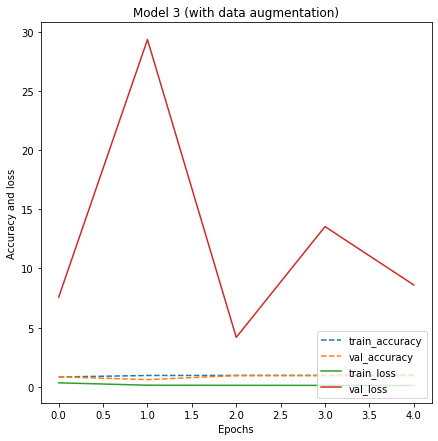

In [110]:
# Plotting the accuracies and loss
plot_accuracy(history3, "Model 3 (with data augmentation)")

Test Accuracy

In [111]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(n_test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0854 - accuracy: 0.9781

 Test_Accuracy:- 0.9780769348144531


Generate classificarion report and confuision matrix


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1300
           1       0.98      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



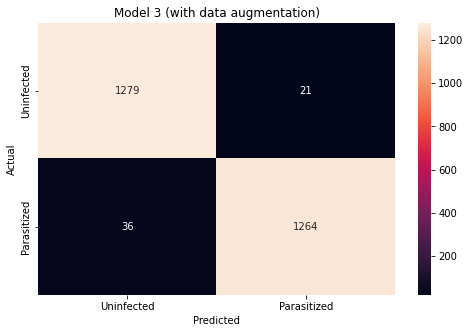

In [112]:
cm(model3, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 3 (with data augmentation)", True)

Observations and Insights:

While it is 97,8 percent accurate, there are better models. However, it is also conceivable that this particular problem in which the information is very similar to itself is not a good candidate for data augmentation.

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

## **9. Model 3B (Data Augmentation with Gaussian Blur)**

In [113]:
backend.clear_session() # Clearing backend for new model

### 9.0 Using image data generator with the blurred train image set.

In [114]:


gb_X_train, gb_X_val, gb_y_train, gb_y_val = train_test_split(gbx_train, train_labels, test_size = 0.2, random_state = 42)

# Using ImageDataGenerator to generate images
gb_train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.1, rotation_range = 20, shear_range = 30, rescale=1./255, brightness_range=[0.5,1.5],
                                   channel_shift_range=0.06)


gb_val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
gb_train_generator = gb_train_datagen.flow(x = gb_X_train, y = gb_y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
gb_val_generator =  gb_val_datagen.flow(x = gb_X_val, y = gb_y_val, batch_size = 64, seed = 42, shuffle = True)

Visualizing Augmented images

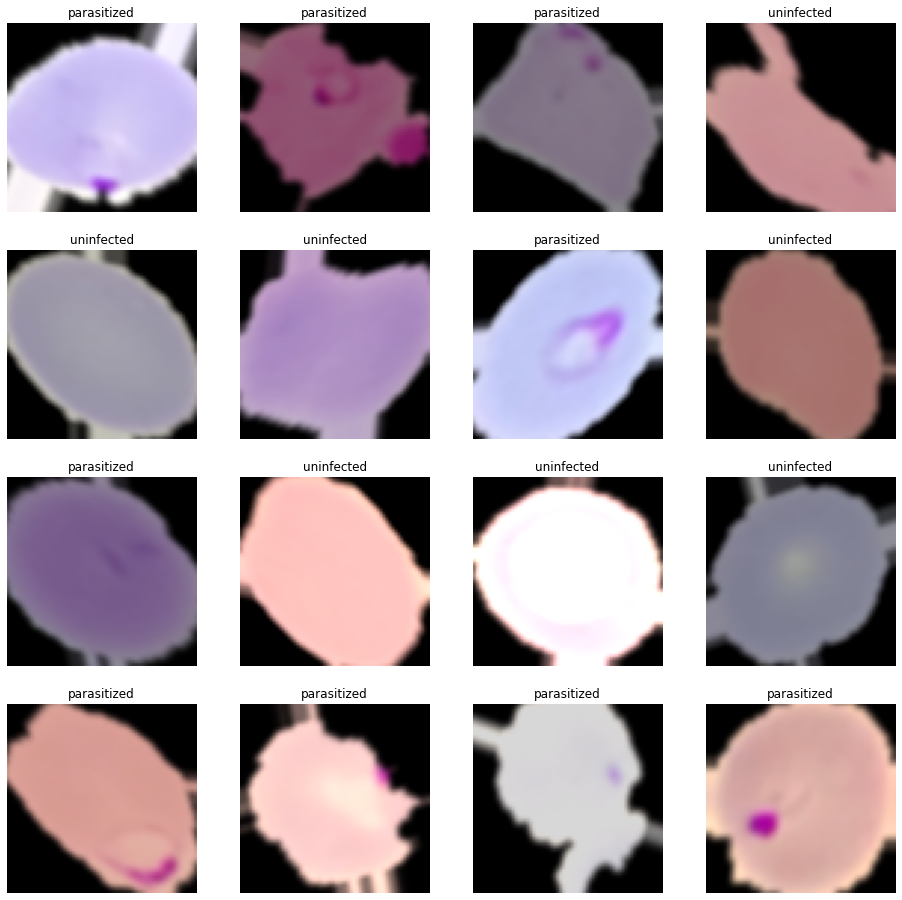

In [115]:
# Creating an iterable for images and labels from the training data
images, labels = next(gb_train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

### 9.1 Building the Model

In [116]:
model3gb = Sequential()

model3gb.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))

# Build the model here and add new layers

# 1st Block:
model3gb.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model3gb.add(LeakyReLU(0.1))
model3gb.add(BatchNormalization())
model3gb.add(MaxPooling2D(pool_size = 4))

# 1st Dropout Layer:
model3gb.add(Dropout(0.25))

# 2nd Block:
model3gb.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model3gb.add(LeakyReLU(0.1))
model3gb.add(MaxPooling2D(pool_size = 4))

# 2nd Dropout Layer:
model3gb.add(Dropout(0.25))

# 3rd Block:
model3gb.add(Conv2D(filters = 32, kernel_size = 2, padding = "same"))
model3gb.add(LeakyReLU(0.1))
model3gb.add(MaxPooling2D(pool_size = 4))

# 3rd Dropout Layer:
model3gb.add(Dropout(0.25))

# Flattening layer:
model3gb.add(Flatten())

# Fully connected layer:
model3gb.add(Dense(512))
model3gb.add(LeakyReLU(0.1))

# 4th Dropout Layer:
model3gb.add(Dropout(0.25))

# Classifyer: 
model3gb.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

adam = optimizers.Adam(learning_rate = 0.005)

model3gb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4128      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0

In [117]:
model3gb.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b>Using Callbacks

In [118]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_accuracy', save_best_only = True)]

### 9.2 Fit and Train the model

In [119]:
history3gb = model3gb.fit(gb_train_generator, 
                                  validation_data = gb_val_generator,
                                  batch_size = 64, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 30s 93ms/step - loss: 0.3362 - accuracy: 0.8358 - val_loss: 0.1062 - val_accuracy: 0.9661
Epoch 2/20
312/312 [==============================] - 29s 93ms/step - loss: 0.1529 - accuracy: 0.9536 - val_loss: 0.1078 - val_accuracy: 0.9679
Epoch 3/20
312/312 [==============================] - 29s 93ms/step - loss: 0.1358 - accuracy: 0.9588 - val_loss: 0.1445 - val_accuracy: 0.9635


In [137]:
#saving model:
model3gb.save("model3gb.h5")

### 9.3 Evaluating the model

Plot the train and validation curves


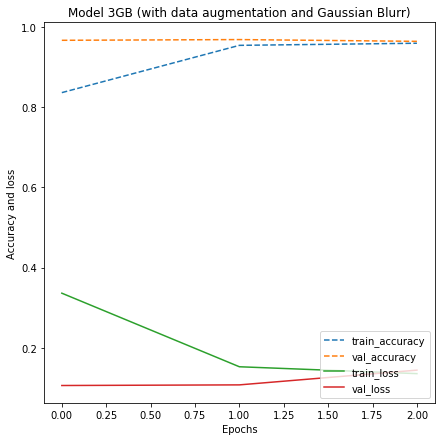

In [121]:
# Plotting the accuracies and loss
plot_accuracy(history3gb, "Model 3GB (with data augmentation and Gaussian Blurr)")

Test Accuracy

In [122]:
# Evaluating the model on test data
accuracy3gb = model3gb.evaluate(gbx_test, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3gb[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.1456 - accuracy: 0.9635

 Test_Accuracy:- 0.9634615182876587


Generate classificarion report and confuision matrix


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1300
           1       0.99      0.94      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



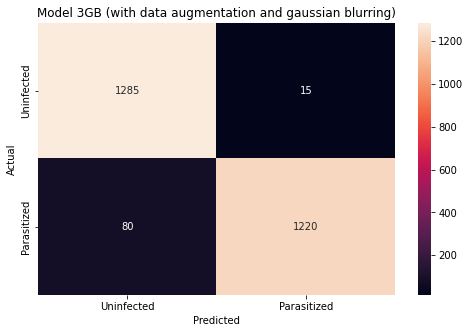

In [123]:
cm(model3gb, gbx_test, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 3GB (with data augmentation and gaussian blurring)", True)

Observations and Insights:

While it is 96 percent accurate, there are better models.

## **10. Model 4 with Pre-trained model (VGG16)**

In [124]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### 10.1 Getting the pre-trained layers and top


In [125]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [126]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model

Compiling the model

In [127]:
# Compiling the model 
adam = optimizers.Adam(learning_rate = 0.001)

model4.compile(loss ="binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

<b> using callbacks

In [128]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 3),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

### 10.2 Fit and Train the model

In [129]:
# Fitting the model and running the model for 10 epochs
history4 = model4.fit(
            n_train_images, train_labels,
            epochs = 20,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/20
624/624 [==============================] - 11s 15ms/step - loss: 0.2347 - accuracy: 0.9075 - val_loss: 0.3191 - val_accuracy: 0.8878
Epoch 2/20
624/624 [==============================] - 9s 14ms/step - loss: 0.1886 - accuracy: 0.9278 - val_loss: 0.1823 - val_accuracy: 0.9495
Epoch 3/20
624/624 [==============================] - 9s 14ms/step - loss: 0.1793 - accuracy: 0.9309 - val_loss: 0.0762 - val_accuracy: 0.9870
Epoch 4/20
624/624 [==============================] - 9s 14ms/step - loss: 0.1725 - accuracy: 0.9345 - val_loss: 0.0974 - val_accuracy: 0.9822
Epoch 5/20
624/624 [==============================] - 9s 14ms/step - loss: 0.1679 - accuracy: 0.9364 - val_loss: 0.0905 - val_accuracy: 0.9826
Epoch 6/20
624/624 [==============================] - 9s 14ms/step - loss: 0.1684 - accuracy: 0.9367 - val_loss: 0.4916 - val_accuracy: 0.8187


In [136]:
#saving the model:
model4.save("model4.h5")

### 10.3 Evaluating the model

Plot the train and validation curves. 

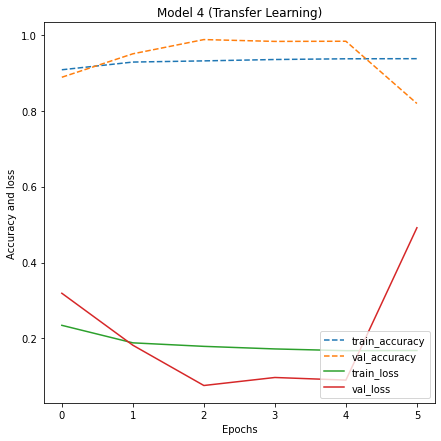

In [131]:
# Plotting the accuracies and loss
plot_accuracy(history4, "Model 4 (Transfer Learning)")

Test Accuracy

In [132]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(n_test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 1s 12ms/step - loss: 0.3825 - accuracy: 0.8496

 Test_Accuracy:- 0.8496153950691223


Generating the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1300
           1       0.77      0.99      0.87      1300

    accuracy                           0.85      2600
   macro avg       0.88      0.85      0.85      2600
weighted avg       0.88      0.85      0.85      2600



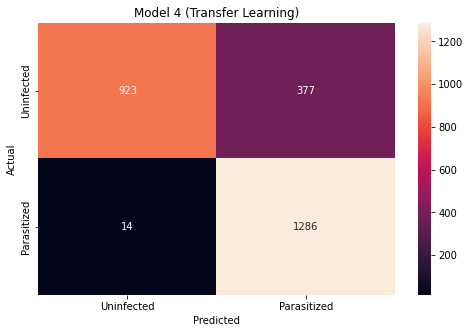

In [133]:
cm(model4, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 4 (Transfer Learning)", True)

Observations and Insights:

The transfer of learning between neural networks does not seem to have been of great help for this problem. 
It is likely that since we are looking for specific information in a series of images that are very similar to each other, without much detail, networks trained with completely different images cannot teach you the key features for this problem.

##**11. Comparing every model performance:**

In [134]:
CG = pd.DataFrame()
CG["model"]= ["Base model","ANN","Model 1", "Model 2","Model 2B", "Model 2(HSV)", "Model 2(GB)", "Model 3","Model 3(GB)", "Model 4"]
CG["Loss"] = [accuracy[0],accuracy_ann[0],accuracy1[0],accuracy2[0],accuracy2b[0], accuracy2gf[0],accuracy2gb[0],accuracy3[0],accuracy3gb[0],accuracy4[0]]
CG["Accuracy"] = [accuracy[1],accuracy_ann[1],accuracy1[1],accuracy2[1],accuracy2b[1],accuracy2gf[1],accuracy2gb[1],accuracy3[1],accuracy3gb[1],accuracy4[1]]
CG.sort_values("Accuracy", ascending=False, ignore_index=True)



,model,Loss,Accuracy
0,Model 2(HSV),0.057434,0.982308
1,Base model,0.070460,0.978077
2,Model 1,0.082166,0.978077
3,Model 2B,0.085449,0.978077
4,Model 3,0.085439,0.978077
5,Model 2(GB),0.098912,0.973846
6,Model 3(GB),0.145593,0.963462
7,Model 4,0.382487,0.849615
8,Model 2,0.472377,0.834231
9,ANN,0.776736,0.607308


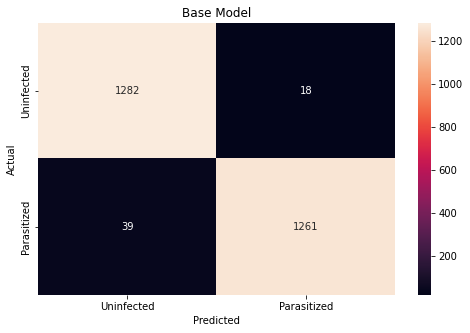

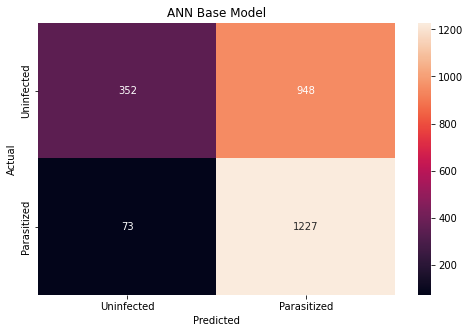

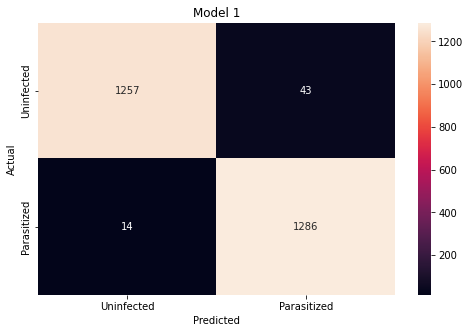

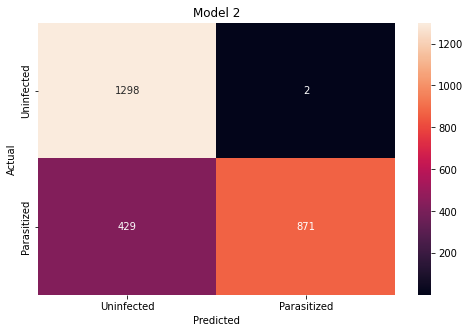

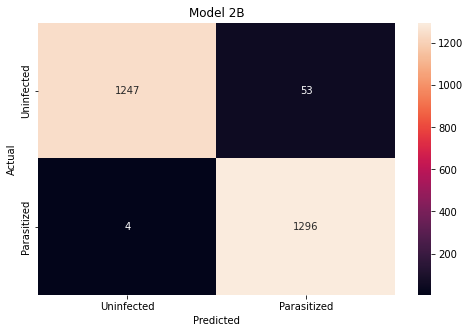

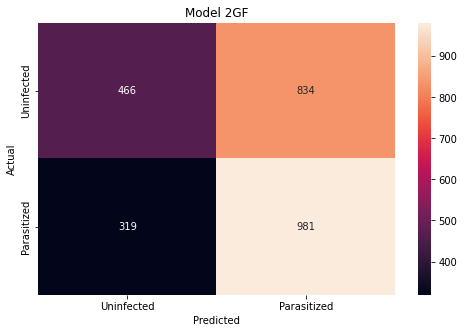

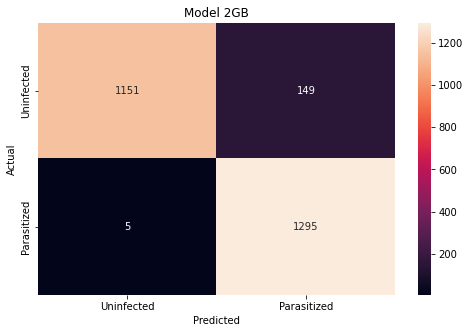

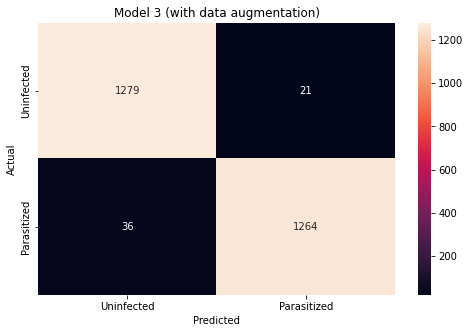

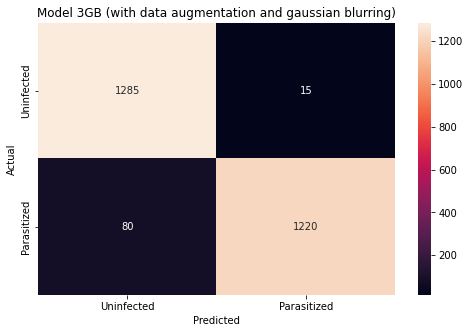

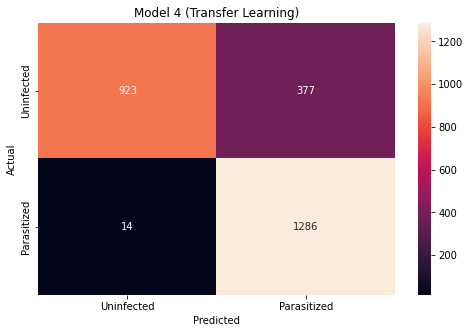

In [135]:

cm(model, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Base Model",False)
cm(ann_base_model, gray_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","ANN Base Model", False)
cm(model1, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 1",False)
cm(model2, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 2",False)
cm(model2b, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 2B",False)
cm(model2gf, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 2GF", False)
cm(model2gb, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 2GB",False)
cm(model3, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 3 (with data augmentation)", False)
cm(model3gb, gbx_test, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 3GB (with data augmentation and gaussian blurring)", False)
cm(model4, n_test_images, test_labels, ["Uninfected", "Parasitized"],"Actual","Predicted","Model 4 (Transfer Learning)", False)

####<b> Observations and Conclusions drawn from the final model: 

Of all the models, model 2B is the one that best performs in the parameters we initially defined. That is: it best captures the positive cases of malaria. 
It has what we judge to be a very good relationship between low false positive error (4 false negatives in 1300 positive cases) and a not very high false positive rate (53 in 1300).

On the other hand, false positives could be resolved simply by performing a second test in cases where it is required (e.g., no other symptoms compatible with malaria, or a person who has risks, comorbidities, or a condition that warrants it).




Each technique has its own observations along with the evaluation of the model that applies it. 
However, some general observations can be made:

Many models performed similarly in terms of accuracy. There are 6 models with accuracy values between 0.978 and 0.982.
However, it is important to consider that not all models make the same errors and that we must therefore carefully assess the risks associated with each of the possible errors.

As we have said before: false negatives imply a great risk for the patient, as he/she might not receive a much-needed treatment. 

While a false positive implies the expense of a drug and treatment for people who do not really need it. 

 Some image transformation techniques have worked well, but one of the simplest techniques applied was the one that gave the best results. 


#### **Insights**

####**Refined insights**:

- What are the most meaningful insights from the data relevant to the problem?


####**Comparison of various techniques and their relative performance**:

Each technique has its own observations along with the evaluation of the model that applies it. However, some general observations can be made:

Many models performed similarly in terms of accuracy. There are 6 models with accuracy values between 0.978 and 0.982. However, it is important to consider that not all models make the same errors and that we must therefore carefully assess the risks associated with each of the possible errors.

As we have said before: false negatives imply a great risk for the patient, as he/she might not receive a much-needed treatment.

While a false positive implies the expense of a drug and treatment for people who do not really need it.

Some image transformation techniques have worked well, but one of the simplest techniques applied was the one that gave the best results.

####**Proposal for the final solution design**:

 The proposed solution is a convolutional neural network (CNN) based mode called “Model 2b”.
 

In terms of performance. Two measures are of particular interest to us: sensitivity or recall and specificity. 

Sensitivity is a measure of the ability of a machine learning model to detect positive cases. 

In our problem it is the ability to detect parasitized cells. Our model was able to identify 1296 out of 1300 (99.69%).  That is, on average, the model gives one false negative for every 325 true positives. 

Specificity is a measure of the ability of a machine learning model to detect negative cases.


        True positive rate (Sensitivity)    1296/1300 (99.69%)
        False negative rate:                 4/1300 (   0.31%)
        True negative rate (Specificity)    1247/1300 (95.92%)
        False positive rate:                 53/1300 (  4.07%)


We prioritize that the level of false negatives to be as low as possible, even if that gives a few extra false positives. 

We consider a false negative as the worst case scenario as it implies diagnosing a malaria-infected person as uninfected and thus not giving the appropriate treatment and medicines. 

What we really want is that a person  does not die of malaria because of a wrong diagnosis. 

On the other hand, a false positive (meaning diagnosing as parasitized uninfected cells is not as bad as it can be solved by retesting (in case of positive without any symptoms) or given anti-malaria treatment, which will not be harmful (but implies the misuse of a scarce resource such as medicine and time). 

Given the implications of each case, it is clear that a false positive error is much more acceptable than a false negative error. 



As for improvement options, it is worth noting that there are a large number of possible combinations of parameters that can be tried, as well as the number of layers that can be added. Therefore, there is always room for improvement (or at least to try).
On the other hand, increasing the training base with more images could lead to an improvement in model performance. 


We propose to work with model 2b which has shown the best balance between false negatives and false positives for our particular problem. 